In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import matplotlib.pyplot  as plt


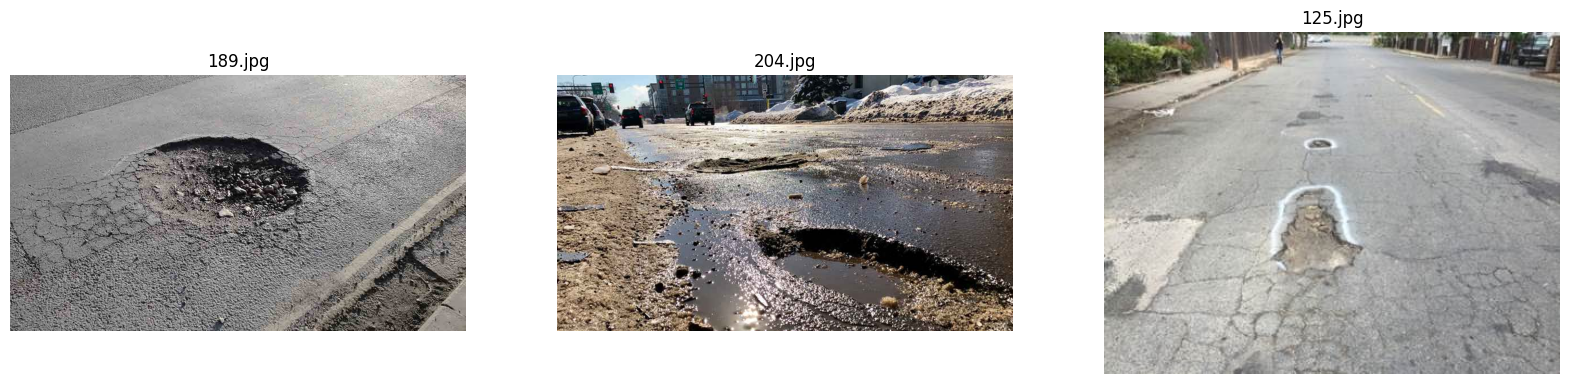

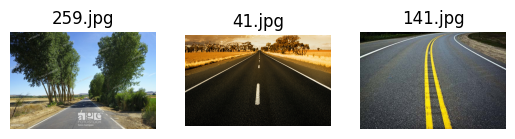

In [2]:
import os
import random

image_directory_pothole = "/kaggle/input/pothole-detection-dataset/potholes"
image_files_pothole = os.listdir(image_directory_pothole)

random_images_pothole = random.sample(image_files_pothole, 3)

plt.figure(figsize=(20, 15))
for i, image_name in enumerate(random_images_pothole):
    img_path = os.path.join(image_directory_pothole, image_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)

plt.show()

image_directory_normal = "/kaggle/input/pothole-detection-dataset/normal"
image_files_normal = os.listdir(image_directory_normal)

random_images_normal = random.sample(image_files_normal, 3)

for i, image_name in enumerate(random_images_normal):
    img_path = os.path.join(image_directory_normal, image_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying correctly
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)
    
plt.show()


In [3]:
train_datagen= ImageDataGenerator(rescale= 1./255, 
                                  shear_range= 0.2, 
                                  zoom_range= 0.2, 
                                  horizontal_flip= True, 
                                  validation_split= 0.2)
training_set= train_datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset',
                                               target_size= (112,112),
                                               batch_size= 32,
                                               class_mode= 'binary',
                                               subset='training')

Found 546 images belonging to 2 classes.


In [4]:
validation_generator= train_datagen.flow_from_directory(
    '/kaggle/input/pothole-detection-dataset',
    target_size=(112, 112),
    batch_size=32,
    class_mode= 'binary',
    subset='validation'
)

Found 135 images belonging to 2 classes.


In [5]:
model= tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[112,112,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=1,strides=1))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[112,112,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=1,strides=1))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', input_shape=[112,112,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=1,strides=1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x= training_set, validation_data= validation_generator, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 156s 8s/step - accuracy: 0.5658 - loss: 8.3030 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.8500 - loss: 0.4495 - val_accuracy: 0.7778 - val_loss: 0.5269
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 147s 8s/step - accuracy: 0.7982 - loss: 0.4538 - val_accuracy: 0.8074 - val_loss: 0.4627
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 147s 8s/step - accuracy: 0.9052 - loss: 0.2749 - val_accuracy: 0.8074 - val_loss: 0.5089
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 147s 8s/step - accuracy: 0.8576 - loss: 0.3177 - val_accuracy: 0.7778 - val_loss: 0.5935
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.8971 - loss: 0.3189 - val_accuracy: 0.8148 - val_loss: 0.5517
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 147s 8s/step - accuracy: 0.8944 - loss: 0.2705 - val_accuracy: 0.8444 - val_loss: 0.5091
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.9095 - loss: 0.1947 - val_accuracy: 0.8593 - val_loss: 0.